In [89]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
if (os.path.basename(os.getcwd()) == 'tutorials'):
    os.chdir('../..')

from src.msa import generate
from src.msa.visualization import plot
from src.msa.feature_extraction import features

from mspc_pca.pca import *
from mspc_pca.omeda import *
from mspc_pca.mspc import *
from mspc_pca.ckf import *
import mspc_pca.plot as pca_plot

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# %matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline


Reading files ...
3 Trace(s) in Stream:
C7.PPMA..HHE | 2021-09-19T00:00:00.310000Z - 2021-09-20T00:00:00.310000Z | 100.0 Hz, 8640001 samples
C7.PPMA..HHN | 2021-09-19T00:00:02.540000Z - 2021-09-20T00:00:00.560000Z | 100.0 Hz, 8639803 samples
C7.PPMA..HHZ | 2021-09-19T00:00:02.540000Z - 2021-09-20T00:00:00.530000Z | 100.0 Hz, 8639800 samples
Merging 3 traces ...


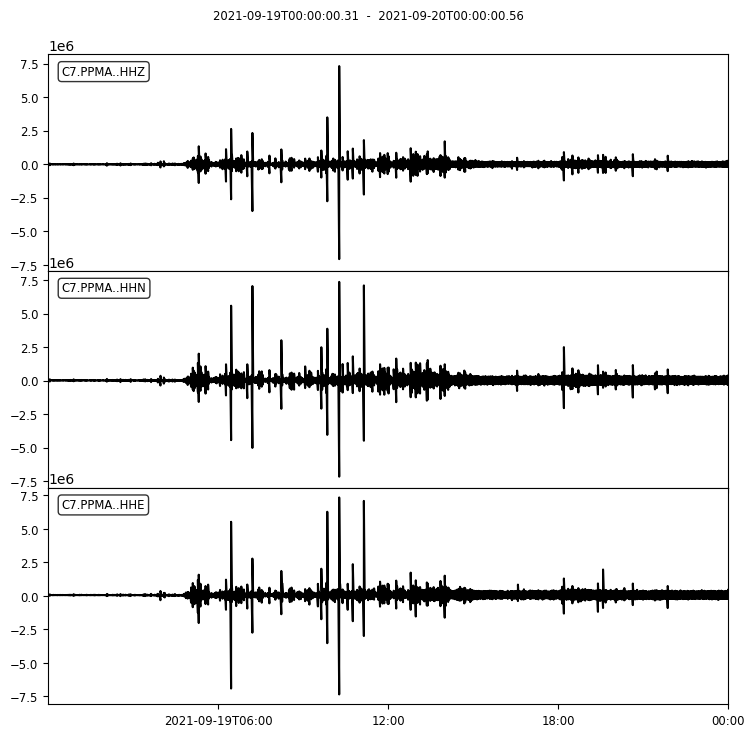

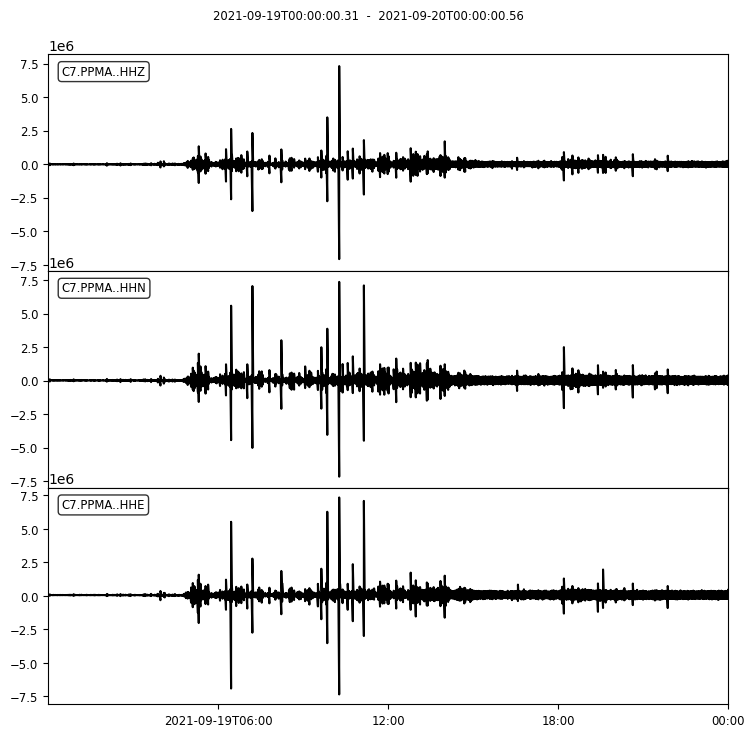

In [90]:
# Use seismic data
import obspy
path = "/media/gsus/76C8A92EC8A8EE15/data/mseed/"#C7.PPMA..*.D.*.*"

files = ['*.PPMA..*.D.2021.213', '*.PPMA..*.D.2021.214', '*.PPMA..*.D.2021.215', '*.PPMA..*.D.2021.216', '*.PPMA..*.D.2021.217', '*.PPMA..*.D.2021.218', '*.PPMA..*.D.2021.219', '*.PPMA..*.D.2021.220', '*.PPMA..*.D.2021.221', '*.PPMA..*.D.2021.222', '*.PPMA..*.D.2021.223', '*.PPMA..*.D.2021.224', '*.PPMA..*.D.2021.225', '*.PPMA..*.D.2021.226', '*.PPMA..*.D.2021.227', '*.PPMA..*.D.2021.228', '*.PPMA..*.D.2021.229', '*.PPMA..*.D.2021.230', '*.PPMA..*.D.2021.231', '*.PPMA..*.D.2021.232', '*.PPMA..*.D.2021.233', '*.PPMA..*.D.2021.234', '*.PPMA..*.D.2021.235', '*.PPMA..*.D.2021.236', '*.PPMA..*.D.2021.237', '*.PPMA..*.D.2021.238', '*.PPMA..*.D.2021.239', '*.PPMA..*.D.2021.240', '*.PPMA..*.D.2021.241', '*.PPMA..*.D.2021.242', '*.PPMA..*.D.2021.243', '*.PPMA..*.D.2021.244', '*.PPMA..*.D.2021.245', '*.PPMA..*.D.2021.246', '*.PPMA..*.D.2021.247', '*.PPMA..*.D.2021.248', '*.PPMA..*.D.2021.249', '*.PPMA..*.D.2021.250', '*.PPMA..*.D.2021.251', '*.PPMA..*.D.2021.252', '*.PPMA..*.D.2021.253', '*.PPMA..*.D.2021.254', '*.PPMA..*.D.2021.255', '*.PPMA..*.D.2021.256', '*.PPMA..*.D.2021.257', '*.PPMA..*.D.2021.258', '*.PPMA..*.D.2021.259', '*.PPMA..*.D.2021.260', '*.PPMA..*.D.2021.261', '*.PPMA..*.D.2021.262', '*.PPMA..*.D.2021.263', '*.PPMA..*.D.2021.264', '*.PPMA..*.D.2021.265', '*.PPMA..*.D.2021.266', '*.PPMA..*.D.2021.267', '*.PPMA..*.D.2021.268', '*.PPMA..*.D.2021.269', '*.PPMA..*.D.2021.270', '*.PPMA..*.D.2021.271', '*.PPMA..*.D.2021.272', '*.PPMA..*.D.2021.273', '*.PPMA..*.D.2021.274', '*.PPMA..*.D.2021.275', '*.PPMA..*.D.2021.276', '*.PPMA..*.D.2021.277', '*.PPMA..*.D.2021.278', '*.PPMA..*.D.2021.279', '*.PPMA..*.D.2021.280', '*.PPMA..*.D.2021.281', '*.PPMA..*.D.2021.282', '*.PPMA..*.D.2021.283', '*.PPMA..*.D.2021.284', '*.PPMA..*.D.2021.285', '*.PPMA..*.D.2021.286', '*.PPMA..*.D.2021.287', '*.PPMA..*.D.2021.288', '*.PPMA..*.D.2021.289', '*.PPMA..*.D.2021.290', '*.PPMA..*.D.2021.291', '*.PPMA..*.D.2021.292', '*.PPMA..*.D.2021.293', '*.PPMA..*.D.2021.294', '*.PPMA..*.D.2021.295', '*.PPMA..*.D.2021.296', '*.PPMA..*.D.2021.297', '*.PPMA..*.D.2021.298', '*.PPMA..*.D.2021.299', '*.PPMA..*.D.2021.300', '*.PPMA..*.D.2021.301', '*.PPMA..*.D.2021.302', '*.PPMA..*.D.2021.303', '*.PPMA..*.D.2021.304', '*.PPMA..*.D.2021.305', '*.PPMA..*.D.2021.306', '*.PPMA..*.D.2021.307', '*.PPMA..*.D.2021.308', '*.PPMA..*.D.2021.309', '*.PPMA..*.D.2021.310', '*.PPMA..*.D.2021.311', '*.PPMA..*.D.2021.312', '*.PPMA..*.D.2021.313', '*.PPMA..*.D.2021.314', '*.PPMA..*.D.2021.315', '*.PPMA..*.D.2021.316', '*.PPMA..*.D.2021.317', '*.PPMA..*.D.2021.318', '*.PPMA..*.D.2021.319', '*.PPMA..*.D.2021.320', '*.PPMA..*.D.2021.321', '*.PPMA..*.D.2021.322', '*.PPMA..*.D.2021.323', '*.PPMA..*.D.2021.324', '*.PPMA..*.D.2021.325', '*.PPMA..*.D.2021.326', '*.PPMA..*.D.2021.327', '*.PPMA..*.D.2021.328', '*.PPMA..*.D.2021.329', '*.PPMA..*.D.2021.330', '*.PPMA..*.D.2021.331', '*.PPMA..*.D.2021.332', '*.PPMA..*.D.2021.333', '*.PPMA..*.D.2021.334', '*.PPMA..*.D.2021.335', '*.PPMA..*.D.2021.336', '*.PPMA..*.D.2021.337', '*.PPMA..*.D.2021.338', '*.PPMA..*.D.2021.339', '*.PPMA..*.D.2021.340', '*.PPMA..*.D.2021.341', '*.PPMA..*.D.2021.342', '*.PPMA..*.D.2021.343', '*.PPMA..*.D.2021.344', '*.PPMA..*.D.2021.345', '*.PPMA..*.D.2021.346', '*.PPMA..*.D.2021.347', '*.PPMA..*.D.2021.348', '*.PPMA..*.D.2021.349', '*.PPMA..*.D.2021.350', '*.PPMA..*.D.2021.351', '*.PPMA..*.D.2021.352', '*.PPMA..*.D.2021.353', '*.PPMA..*.D.2021.354', '*.PPMA..*.D.2021.355', '*.PPMA..*.D.2021.356', '*.PPMA..*.D.2021.357', '*.PPMA..*.D.2021.358', '*.PPMA..*.D.2021.359', '*.PPMA..*.D.2021.360', '*.PPMA..*.D.2021.361', '*.PPMA..*.D.2021.362', '*.PPMA..*.D.2021.363', '*.PPMA..*.D.2021.364', '*.PPMA..*.D.2021.365', '*.PPMA..*.D.2022.001', '*.PPMA..*.D.2022.002', '*.PPMA..*.D.2022.003', '*.PPMA..*.D.2022.004', '*.PPMA..*.D.2022.005', '*.PPMA..*.D.2022.006', '*.PPMA..*.D.2022.007', '*.PPMA..*.D.2022.008', '*.PPMA..*.D.2022.009', '*.PPMA..*.D.2022.010', '*.PPMA..*.D.2022.011', '*.PPMA..*.D.2022.012', '*.PPMA..*.D.2022.013', '*.PPMA..*.D.2022.014', '*.PPMA..*.D.2022.015', '*.PPMA..*.D.2022.016', '*.PPMA..*.D.2022.017', '*.PPMA..*.D.2022.018', '*.PPMA..*.D.2022.019', '*.PPMA..*.D.2022.020', '*.PPMA..*.D.2022.021', '*.PPMA..*.D.2022.022', '*.PPMA..*.D.2022.023', '*.PPMA..*.D.2022.024', '*.PPMA..*.D.2022.025', '*.PPMA..*.D.2022.026', '*.PPMA..*.D.2022.027', '*.PPMA..*.D.2022.028', '*.PPMA..*.D.2022.029', '*.PPMA..*.D.2022.030', '*.PPMA..*.D.2022.031', '*.PPMA..*.D.2022.032']
files = files[49:50]
title = ""
filepath = []

for file in files:
    filepath.append(path+file)
    
print(f"Reading files ...")

if type(filepath)==str:
    st = obspy.read(filepath)
else: 
    st = obspy.read(filepath[0])
    for i in range(1,len(filepath)):
        try:
            st+= obspy.read(filepath[i])
            print(f"Reading {filepath[i]} data...")
        except:print(f"{filepath[i]} not read.")

print(st.__str__(extended=True))

print(f"Merging {len(st)} traces ...")
st.merge()


tr = st[1]
signal = tr.data
sr = tr.stats.sampling_rate
st.plot()

In [97]:
N = len(st)
times = [[] for _ in range(N)]
freqs = [[] for _ in range(N)]
Sxxs  = [[] for _ in range(N)] 

window_length= 60 # s
window_shift = 10 # s

window_samples = int(sr*window_length)
hop = int(sr*window_shift)

for i, tr in enumerate(st):
    signal= tr.data
    time, freq, Sxx = features.spectrogram(signal, sr,window_samples, hop, "blackman", "zeros", 'linear',)
    times[i] = time[0:8644]
    freqs[i] = freq
    Sxxs[i] = Sxx[:,0:8644]
    print(Sxx.shape, time.shape, freq.shape)


(3001, 8646) (8646,) (3001,)
(3001, 8645) (8645,) (3001,)
(3001, 8645) (8645,) (3001,)


(3001, 8645) (8645,) (3001,)


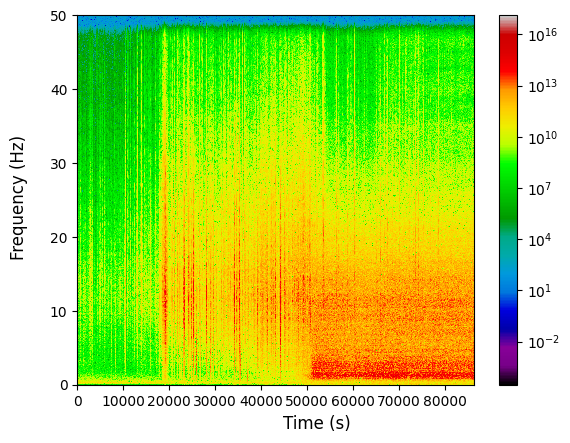

In [93]:
_, _ , mesh = plot.spectrogram(time, freq, Sxx, cmap="nipy_spectral",logscale=True)


In [101]:
data  = np.concatenate(Sxxs, axis=0)
data = data.T
data.shape

(8644, 9003)

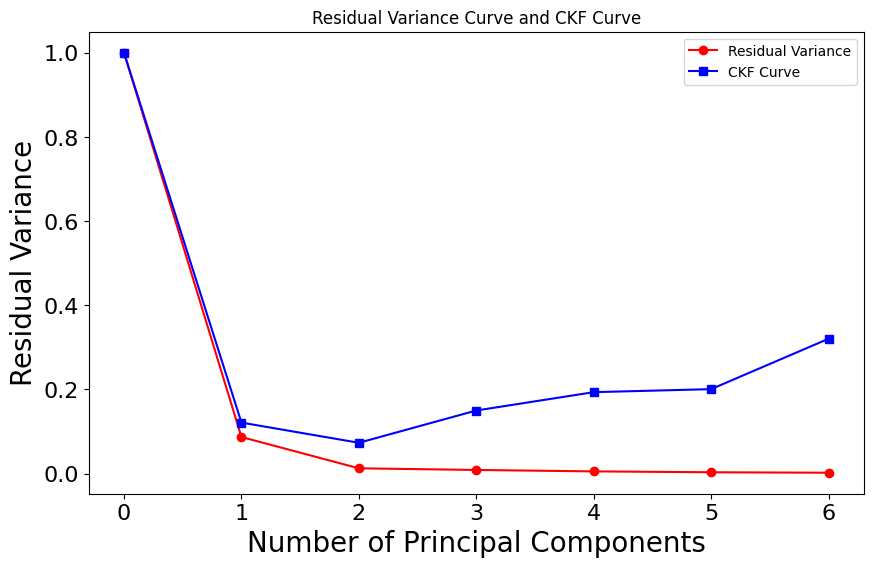

In [102]:
autoscale= False
scaler = StandardScaler(with_std=autoscale)
data_norm = scaler.fit_transform(data)
pca_plot.var_pca(data, 6, autoscale);

In [103]:
data.shape, len(times[1]), len(freqs[1])

((8644, 9003), 8644, 3001)

In [ ]:
pca = PCA(n_components=2)

# freqs = freqs[0]+freqs[1]+freqs[2]

freqs_concat = [elemento for sublista in freqs for elemento in sublista]
freqs_label = [f"{np.round(x, 2)}Hz" for x in freqs_concat]
# times_label = [f"{np.round(x, 2)}s" for x in times]
_,_,scatter = pca_plot.biplot(data_norm, pca, 1, 2, label_dist=0.3, score_labels=times[1],
                              loading_labels=freqs_label, size=10,)


/home/gsus/Documentos/GitHub/MESA/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/gsus/Documentos/GitHub/MESA/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
freqs

np.float64(0.15000000000000002)